<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [ ]:
## Import all the tools needed
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
#
import pandas as pd
import numpy as np
#
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
#
import pylab as pl
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
!conda install -c anaconda seaborn -y

### About dataset

This data is organically generated from real world characteristics. The                                                              |

Lets download the dataset

In [26]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"

--2020-05-23 17:07:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2020-05-23 17:07:37 (1.12 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [30]:
# Read in, copy and preserve original
df = pd.read_csv('loan_train.csv')
df
df_rdc = df
df_rdc
# Dump file
#df = pd.read_csv(filename, names = headers)
headers = ["UDI1","UDI2","FYHold","FUNDS","Months", "effective_date","due_date","Score","Group","ORG"]
df_newhead = pd.read_csv(filename, names = headers)
df_newhead

,UDI1,UDI2,FYHold,FUNDS,Months,effective_date,due_date,Score,Group,ORG
0,NaN,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
1,0.0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
2,2.0,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3.0,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4.0,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
...,...,...,...,...,...,...,...,...,...,...
342,394.0,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
343,395.0,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
344,397.0,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
345,398.0,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [36]:
## Make relevant data to our work
#Drop row with NaN and float scorevalue, average score is normalized
df_newhead.dropna(subset=["UDI1"], axis=0, inplace=True)
df_newhead["Score"]=df_newhead["Score"].astype("float")

##. Here are the headers = ["UDI1","UDI2","FYHold","FUNDS","Months", "effective_date","due_date","Score","Group","ORG"]
df_rdc.replace({'loan_status': {'PAIDOFF': 'onhold', 'COLLECTION': 'FY'}}, inplace=True)
df_newhead.replace({'FYhold': {'PAIDOFF': 'onhold', 'COLLECTION': 'FY'}}, inplace=True)


df_rdc.replace({'education': {'High School or Below': 'MSCOE', 'Bechalor': 'AVIATION','college':'STIC', 'Master or Above':'Surface'}},inplace=True)
df_newhead.replace({'Group': {'High School or Below': 'MSCOE', 'Bechalor': 'AVIATION','college':'STIC', 'Master or Above':'Surface'}},inplace=True)

## Terms is 1 or 2 year execution
df_rdc.replace({'terms': {15: 24, 30: 12}},inplace=True)
df_newhead.replace({'Months': {15: 24, 30: 12}},inplace=True)

df_rdc.replace({'Gender': {'male': 'RDC', 'female': 'OPS'}},inplace=True)
df_newhead.replace({'ORG': {'male': 'RDC', 'female': 'OPS'}},inplace=True)
df_newhead.replace({'Months': {15: 24, 30: 12}},inplace=True)

#
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
#df_rdc['city-L/100km'] = 235/df["city-mpg"]
df_rdc.age.max()
df_rdc.age.min()
df_newhead.Score.max()
df_newhead.Score.min()
print ("Min score",df_rdc.age.min())
print ("Max Score", df_rdc.age.max())
#print ("Min score",df_newhead.Score.min())
#print ("Max Score",df_newhead.Score.max())
df_newhead.head(30)
df_newhead['FYHold'].value_counts()

Min score 18
Max Score 51


onhold    260
FY         86
Name: FYHold, dtype: int64

In [37]:
#make numbers mroe interesting
df_newhead["Score"]= 23/df_newhead["Score"]
#df_rdc['city-L/100km'] = 235/df["city-mpg"]
df_newhead.replace({'FYHold': {'PAIDOFF': 'onhold', 'COLLECTION': 'FY'}}, inplace=True)
df_newhead.head(30)

,UDI1,UDI2,FYHold,FUNDS,Months,effective_date,due_date,Score,Group,ORG
1,0.0,0,onhold,1000,30,9/8/2016,10/7/2016,45.0,MSCOE,RDC
2,2.0,2,onhold,1000,30,9/8/2016,10/7/2016,33.0,AVIATION,OPS
3,3.0,3,onhold,1000,15,9/8/2016,9/22/2016,27.0,STIC,RDC
4,4.0,4,onhold,1000,30,9/9/2016,10/8/2016,28.0,STIC,OPS
5,6.0,6,onhold,1000,30,9/9/2016,10/8/2016,29.0,STIC,RDC
6,7.0,7,onhold,1000,30,9/9/2016,10/8/2016,36.0,STIC,RDC
7,8.0,8,onhold,1000,30,9/9/2016,10/8/2016,28.0,STIC,RDC
8,9.0,9,onhold,800,15,9/10/2016,9/24/2016,26.0,STIC,RDC
9,10.0,10,onhold,300,7,9/10/2016,9/16/2016,29.0,STIC,RDC
10,11.0,11,onhold,1000,15,9/10/2016,10/9/2016,39.0,MSCOE,RDC


Minimum and maximum score from Portfolio review

In [38]:
df_newhead.head(30)
df_newhead["Score"]= df_newhead["Score"].astype("float")
#make numbers mroe interesting
df_newhead["Score"]= 23/df_newhead["Score"]
#df_rdc['city-L/100km'] = 235/df["city-mpg"]
df_newhead.head(30)

,UDI1,UDI2,FYHold,FUNDS,Months,effective_date,due_date,Score,Group,ORG
1,0.0,0,onhold,1000,30,9/8/2016,10/7/2016,0.511111,MSCOE,RDC
2,2.0,2,onhold,1000,30,9/8/2016,10/7/2016,0.696970,AVIATION,OPS
3,3.0,3,onhold,1000,15,9/8/2016,9/22/2016,0.851852,STIC,RDC
4,4.0,4,onhold,1000,30,9/9/2016,10/8/2016,0.821429,STIC,OPS
5,6.0,6,onhold,1000,30,9/9/2016,10/8/2016,0.793103,STIC,RDC
6,7.0,7,onhold,1000,30,9/9/2016,10/8/2016,0.638889,STIC,RDC
7,8.0,8,onhold,1000,30,9/9/2016,10/8/2016,0.821429,STIC,RDC
8,9.0,9,onhold,800,15,9/10/2016,9/24/2016,0.884615,STIC,RDC
9,10.0,10,onhold,300,7,9/10/2016,9/16/2016,0.793103,STIC,RDC
10,11.0,11,onhold,1000,15,9/10/2016,10/9/2016,0.589744,MSCOE,RDC


### Some data conversions

In [82]:
# Conversions
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()
df_rdc['due_date'] = pd.to_datetime(df_rdc['due_date'])
df_rdc['effective_date'] = pd.to_datetime(df_rdc['effective_date'])
df_rdc 

df_newhead['due_date'] = pd.to_datetime(df_rdc['due_date'])
df_newhead['effective_date'] = pd.to_datetime(df_rdc['effective_date'])

df_newhead["FUNDS"]= df_newhead["FUNDS"].astype("float")
df_newhead["Months"]= df_newhead["Months"].astype("int")

#make numbers mroe interesting
#df_newhead["FUNDS"]= df_newhead["FUNDS"]/3.25
#df_rdc['city-L/100km'] = 235/df["city-mpg"]

#df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#df.groupby(['education'])['loan_status'].value_counts(normalize=True)
#df_rdc['Gender'].replace(to_replace=['RDC','ACQ'], value=[0,1],inplace=True)
#df_newhead['ORG'].replace(to_replace=['RDC','ACQ'], value=[0,1],inplace=True)
df_newhead.head(30)
df_newhead.dtypes

UDI1                     float64
UDI2                      object
FYHold                    object
FUNDS                    float64
Months                     int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
Score                    float64
Group                     object
ORG                       object
dtype: object

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [42]:
## Let's convert the original to RDC relevant

#df['loan_status'].value_counts()

#
print(" Projects Funded and Onhold ")
df_rdc['loan_status'].value_counts()
df_newhead['FYHold'].value_counts()

 Projects Funded and Onhold 


onhold    260
FY         86
Name: FYHold, dtype: int64

260 Project Onhold on time while 86 To Be Executed 


Lets plot some columns to see relationship by branch and score

In [43]:
# notice: installing seaborn might takes a few minutes ###
#!conda install -c anaconda seaborn -y

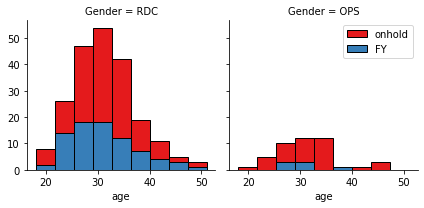

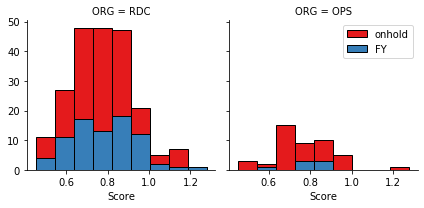

Min score 18
Max Score 51
Min score 0.45098039215686275
Max Score 1.2777777777777777


In [46]:
import seaborn as sns

#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
# show relation to score 18 - 51
bins = np.linspace(df_rdc.age.min(), df_rdc.age.max(), 10)
g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
#--------------------------------------------
# show relation to score 18 - 51
bins = np.linspace(df_newhead.Score.min(), df_newhead.Score.max(), 10)
g = sns.FacetGrid(df_newhead, col="ORG", hue="FYHold", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
print ("Min score",df_rdc.age.min())
print ("Max Score", df_rdc.age.max())
print ("Min score",df_newhead.Score.min())
print ("Max Score", df_newhead.Score.max())


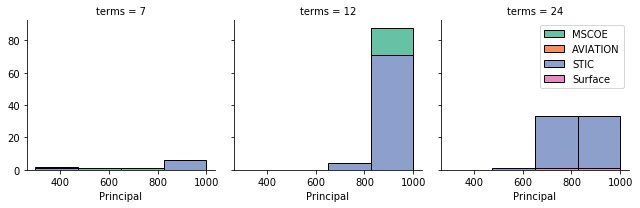

UDI1                     float64
UDI2                      object
FYHold                    object
FUNDS                    float64
Months                    object
effective_date    datetime64[ns]
due_date          datetime64[ns]
Score                    float64
Group                     object
ORG                       object
dtype: object

In [47]:
bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 5)
g = sns.FacetGrid(df_rdc, col="terms", hue="education", palette="Set2", col_wrap=3)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()
df_rdc
df_rdc.dtypes

#bins = np.linspace(df_newhead.FYHold.min(), df_newhead.FYHold.max(), 5)
#g = sns.FacetGrid(df_newhead, col="FUNDS", hue="Group", palette="Set2", col_wrap=3)
#g.map(plt.hist, 'FUNDS', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
#df_rdc
df_newhead.dtypes

# Pre-processing:  Feature selection/extraction

## Convert Categorical features to numerical values

Lets look at gender:

In [167]:
df_rdc.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#male/rfeamle translate to RDC and ACQ
df_rdc.groupby(['Principal'])['education'].value_counts(normalize=True)

df_newhead.groupby(['ORG'])['FYHold'].value_counts(normalize=True)
df_newhead.groupby(['Group'])['FUNDS'].value_counts(normalize=True)
df_newhead.groupby(['Months'])['Group'].value_counts(normalize=True)
#df_rdc
#df_rdc.hist(column='age', bins=50)
#df_newhead.hist(column='Score', bins=50)

Months  Group   
15      STIC        0.452703
        MSCOE       0.385135
        AVIATION    0.148649
        Surface     0.013514
30      MSCOE       0.483696
        STIC        0.407609
        AVIATION    0.108696
7       STIC        0.500000
        MSCOE       0.357143
        AVIATION    0.142857
Name: Group, dtype: float64

For Principal/Cost amounts (x10k) EX) For this sample data  75% Aviation projects with funding $88K , 
Surface has 50% of their projects funded at $71k. In this sampling MSCOE had 48% of project lasting 30 months and 
half of Surface projects last 7 months.

Lets convert male to 0 and female to 1:


In [148]:
#df_rdc['Gender'].replace(to_replace=['RDC','ACQ'], value=[0,1],inplace=True)
#df_rdc.head()
#df_rdc['Gender']
#df_rdc['education'].replace(to_replace=['MSCOE','STIC','AVIATION','Surface'], value=[0,1,2,3],inplace=True)
print(df_rdc)
print(df_newhead)

     Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0             0             0      onhold       1000     12     2016-09-08   
1             2             2      onhold       1000     12     2016-09-08   
2             3             3      onhold       1000     24     2016-09-08   
3             4             4      onhold       1000     12     2016-09-09   
4             6             6      onhold       1000     12     2016-09-09   
..          ...           ...         ...        ...    ...            ...   
341         394           394          FY        800     24     2016-09-11   
342         395           395          FY       1000     12     2016-09-11   
343         397           397          FY        800     24     2016-09-12   
344         398           398          FY       1000     12     2016-09-12   
345         399           399          FY       1000     12     2016-09-12   

      due_date  age education  Gender  
0   2016-10-07   45    

## One Hot Encoding  
#### How about Branches?
Of those categorized as Aviation, 45% executed as 30 month projects
Of those categorized as MSCOE 37% executed as 15 month projects
Of those categorized as STIC 44% executed as 15 month projects

In [62]:
#df.groupby(['education'])['loan_status'].value_counts(normalize=True)

#df_rdc.groupby(['education'])['loan_status'].value_counts(normalize=True)
#df_rdc.groupby(['education'])['terms'].value_counts(normalize=True)
print ('Look at by Group for length of project in Months')
print('This might reveal how project length is associated with a Branch')
df_newhead.groupby(['Group'])['Months'].value_counts(normalize=True)


Look at by Group for length of project in Months
This might reveal that how project length is associated with a Branch


Group     Months
AVIATION  15        0.500000
          30        0.454545
          7         0.045455
MSCOE     30        0.589404
          15        0.377483
          7         0.033113
STIC      30        0.503356
          15        0.449664
          7         0.046980
Surface   15        1.000000
Name: Months, dtype: float64

In [63]:
print ('Look at by Group for onhold or execute')
print ('This might reveal how Branch relates to onhold or execution status ')
df_newhead.groupby(['Group'])['FYHold'].value_counts(normalize=True)

Look at by Group for onhold or execute
This might reveal how Branch relates to onhold or execution status 


Group     FYHold
AVIATION  onhold    0.750000
          FY        0.250000
MSCOE     onhold    0.741722
          FY        0.258278
STIC      onhold    0.765101
          FY        0.234899
Surface   FY        0.500000
          onhold    0.500000
Name: FYHold, dtype: float64

In [64]:
print ('Look at by Score for onhold or execute')
print ('This might reveal how Branch and Score coud be related')
df_newhead.groupby(['Group'])['Score'].value_counts(normalize=True)


Look at by Score for onhold or execute
This might reveal how Branch and Score coud be related


Group     Score   
AVIATION  0.657143    0.136364
          0.676471    0.136364
          0.741935    0.090909
          0.821429    0.090909
          0.884615    0.090909
                        ...   
STIC      0.547619    0.006711
          1.095238    0.006711
          1.277778    0.006711
Surface   0.460000    0.500000
          0.589744    0.500000
Name: Score, Length: 74, dtype: float64

In [80]:
df_newhead.dtypes

UDI1                     float64
UDI2                      object
FYHold                    object
FUNDS                    float64
Months                    object
effective_date    datetime64[ns]
due_date          datetime64[ns]
Score                    float64
Group                     object
ORG                       object
dtype: object

In [70]:
df_newhead.head()

,UDI1,UDI2,FYHold,FUNDS,Months,effective_date,due_date,Score,Group,ORG
1,0.0,0,onhold,307.692308,30,2016-09-08,2016-10-07,0.511111,MSCOE,RDC
2,2.0,2,onhold,307.692308,30,2016-09-08,2016-09-22,0.696970,AVIATION,OPS
3,3.0,3,onhold,307.692308,15,2016-09-09,2016-10-08,0.851852,STIC,RDC
4,4.0,4,onhold,307.692308,30,2016-09-09,2016-10-08,0.821429,STIC,OPS
5,6.0,6,onhold,307.692308,30,2016-09-09,2016-10-08,0.793103,STIC,RDC


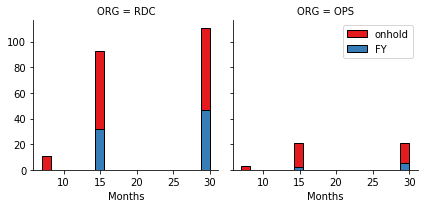

In [85]:
#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="loan_status", hue="education", palette="Set3", col_wrap=2)
#g.map(plt.hist, 'loan_status', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
#
#bins = np.linspace(df_newhead.Months.min(), df_newhead.Months.max(), 10)
#g = sns.FacetGrid(df_newhead, col="FYHold", hue="Group", palette="Set3", col_wrap=2)
#g.map(plt.hist, 'Group', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
import seaborn as sns

#bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
#g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()


bins = np.linspace(df_newhead.Months.min(), df_newhead.Months.max(), 20)
g = sns.FacetGrid(df_newhead, col="ORG", hue="FYHold", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Months', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

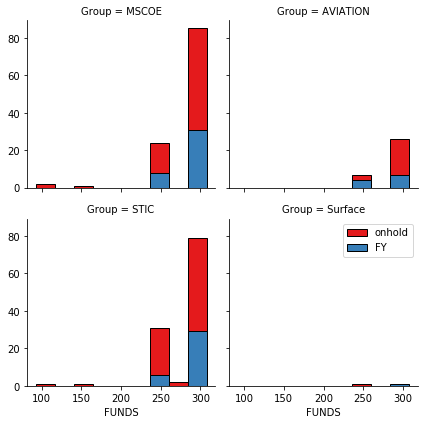

In [87]:
import seaborn as sns

#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
# show relation to score 18 - 51
#bins = np.linspace(df_rdc.age.min(), df_rdc.age.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'age', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
#----------------------------------------------------
import seaborn as sns

#bins = np.linspace(df_rdc.Principal.min(), df_rdc.Principal.max(), 10)
#g = sns.FacetGrid(df_rdc, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()
# show relation to score 18 - 51
bins = np.linspace(df_newhead.FUNDS.min(), df_newhead.FUNDS.max(), 10)
g = sns.FacetGrid(df_newhead, col="Group", hue="FYHold", palette="Set1", col_wrap=2)
g.map(plt.hist, 'FUNDS', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

THese graphs map how projects by branch can be viewed for onhold or execution status. Total record count = 346.

#### Feature befor One Hot Encoding

In [98]:
#df[['Principal','terms','age','Gender','education']].head()
#df_rdc[['Principal','terms','age','Gender','education']].head()

df_newhead[['FUNDS','Score','Months']].head


<bound method NDFrame.head of           FUNDS     Score  Months
1    307.692308  0.511111      30
2    307.692308  0.696970      30
3    307.692308  0.851852      15
4    307.692308  0.821429      30
5    307.692308  0.793103      30
..          ...       ...     ...
342  246.153846  0.718750      15
343  307.692308  0.920000      30
344  246.153846  0.589744      15
345  307.692308  0.821429      30
346  307.692308  0.884615      30

[346 rows x 3 columns]>

Use one hot encoding technique to convert categorical varables to binary variables and 
append them to the feature Data Frame. The features tested for classification are FUNDS, Score, Group and Months

In [115]:
Feature = df_rdc[['Principal','terms','age']]
Feature1 = df_newhead[['FUNDS','Score','Months']]
Feature = pd.concat([Feature,pd.get_dummies(df_rdc['age'])], axis=1)


### Feature selection

Lets define feature sets, X: Whether Onhold or executing, Funding amount, Branch assigned, Length of Project

In [116]:
X = Feature
#X[0:5]


The target set is the prediction of whether the result will be on hold or assigned for FY execution

In [117]:
y = df_rdc['loan_status'].values
y[0:30]


array(['onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold',
       'onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold',
       'onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold',
       'onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold',
       'onhold', 'onhold', 'onhold', 'onhold', 'onhold', 'onhold'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [118]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458, -0.79676004,  2.33152555, -0.05383819, -0.07624929,
        -0.09352195, -0.12108987, -0.14369749, -0.15384615, -0.20535013,
        -0.22019275, -0.30246099, -0.27907279, -0.27300945, -0.29092868,
        -0.29092868, -0.24104766, -0.20535013, -0.22731417, -0.2476887 ,
        -0.2476887 , -0.16342041, -0.18120657, -0.16342041, -0.15384615,
        -0.15384615, -0.07624929, -0.09352195, -0.09352195, -0.10814761,
         9.246621  , -0.07624929, -0.05383819, -0.09352195, -0.05383819],
       [ 0.51578458, -0.79676004,  0.34170148, -0.05383819, -0.07624929,
        -0.09352195, -0.12108987, -0.14369749, -0.15384615, -0.20535013,
        -0.22019275, -0.30246099, -0.27907279, -0.27300945, -0.29092868,
        -0.29092868, -0.24104766, -0.20535013,  4.39919779, -0.2476887 ,
        -0.2476887 , -0.16342041, -0.18120657, -0.16342041, -0.15384615,
        -0.15384615, -0.07624929, -0.09352195, -0.09352195, -0.10814761,
        -0.10814761, -0.07624929, -0.05383819, -0.

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [119]:
#USE THIS - figure out how to use given data to split train/test
# from lab example
# IMPORT KNN
#from sklearn.neighbors import KNeighborsClassifier
# Generate confusion matrix
#-------------------------------------------------------------------Examples above
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for k in range(1,10):    
#Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
# let's see the array
    yhat
#mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)

std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
std_acc
#
# From Example ---- begin

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
cm
#from example --------- end
#from labs begin -----
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
std_acc
#from lab END ----

## Take these for final table jaccard_similarity_score(y_test, yhat)
### Assign fr final table
#KNNy_test = y_test
#KNNyhat = yhat
#For LogRegression F1 Score' use variable (y_test, yhat, average='weighted'))
#Jaccard from LAB exercise classifiers
#FOr Logregression Jaccard score:',jaccard_similarity_score(y_test, yhat))
#For 'LogRegression Log Loss Score:',log_loss(y_test, yhat_prob))
#for SVM model take yhat, y_test
#print("Avg (linear kernel) F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))
#
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
KNN_jaccard = jaccard_similarity_score(y_test,yhat)
#help (jaccard_similarity_score)
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)

Train set: (242, 35) (242,)
Test set: (104, 35) (104,)
KNN Jaccard score:  0.7115384615384616
KNN F1 score: 0.6235955056179775


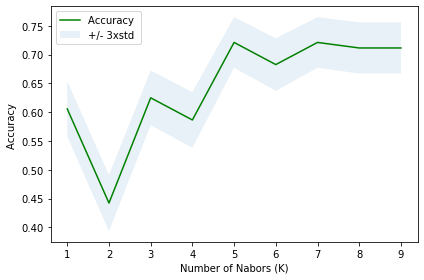

This graph shows best accuracy was with 0.7211538461538461 with k= 5


In [120]:

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "This graph shows best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

# Decision Tree

In [121]:
import numpy as np 
import pandas as pd
# New classifier Decision Tree
#
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree.fit(X_train,y_train)
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

Train set: (242, 35) (242,)
Test set: (104, 35) (104,)


In [122]:
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree # it shows the default parameters
decisionTree.fit(X_train,y_train)
#
predTree = decisionTree.predict(X_test)
#
from sklearn import metrics
import matplotlib.pyplot as plt
#print("DecisionTree Accuracy Jaccard Score: ", metrics.accuracy_score(y_test, predTree))
# From example --- Begin
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predTree)
cm
#from example END
#
#let's see it
print (predTree [0:5])
print (y_test [0:5])
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
#Summarizing so far
#help (jaccard_similarity_score)
## KNN Results 
print ("---------Summarizing results so far ------:")
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)
#
## For Decision Tree ----------------------------------
DECTree_jaccard = jaccard_similarity_score(y_test,predTree)
#help (jaccard_similarity_score)
print ("    DECTree Jaccard score: ",DECTree_jaccard)
#help (f1_score)
DECTree_F1Score = f1_score(y_test,predTree, average ='weighted')
print ("    DECTree F1 score:", DECTree_F1Score)


['onhold' 'onhold' 'onhold' 'onhold' 'onhold']
['onhold' 'onhold' 'onhold' 'onhold' 'onhold']
---------Summarizing results so far ------:
KNN Jaccard score:  0.7115384615384616
KNN F1 score: 0.6107127335940896
    DECTree Jaccard score:  0.7307692307692307
    DECTree F1 score: 0.6252136752136752


KNN with Jaccard, F1Score and Decision Tree Results. So far Decision Tree Jaccard Score is best performer to predict the test set from the training set.

# Support Vector Machine

In [123]:
# EXAMPLE graph from SVM lab
# instructional note ------
#The SVM algorithm offers a choice of kernel functions for 
#performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. 
#The mathematical function used for the transformation is known as the kernel function, 
#and can be of different types, such as:

#1.Linear
#2.Polynomial
#3.Radial basis function (RBF)
#4.Sigmoid

#Each of these functions has its characteristics, its pros and cons, and its equation, 
#but as there's no easy way of knowing which function performs best with any given dataset, 
#we usually choose different functions in turn and compare the results. 
#Let's just use the default, RBF (Radial Basis Function) 

#ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
#cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
#plt.show()
#feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#X = np.asarray(feature_df)
#X[0:5]
# from svm train-test split as above
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


Train set: (276, 35) (276,)
Test set: (70, 35) (70,)


In [124]:
from sklearn import svm
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
###from example 
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
SVM_yhat = SVM_model.predict(X_test)

#SVM_yhat = SVM_model.predict(test_X)
#print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, SVM_yhat))
#print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

#
#SVM_yhat = SVMrbf.predict(X_test)
#print( "svm_yhat",SVM_yhat)
#SVM_F1Score = f1_score(y_test,SVM_yhat)
#SVM_Jaccard = jaccard_similarity_score(y_test,SVM_yhat)
#let's see it
#import itertools
# from example ----
#SVM_yhat = SVM_model.predict(test_X)
#print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, SVM_yhat))
#print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

#help (jaccard_similarity_score)
## Summarizing so far
## --------------------For KNN --------------------
print ("---------Summarizing results so far ------:")
print ("KNN Jaccard score: ",KNN_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#KNN_F1Score = f1_score(y_test,yhat, average ='weighted')
print ("KNN F1 score:", KNN_F1Score)
#
## --------------------For Decision Tree ----------------------------------
#DECTree_jaccard = jaccard_similarity_score(y_test,predTree)
#help (jaccard_similarity_score)
print ("    DECTree Jaccard score: ",DECTree_jaccard)
#help (f1_score)
# uncomment to recalculate with current yhat
#DECTree_F1Score = f1_score(y_test,predTree, average ='weighted')
print ("    DECTree F1 score:", DECTree_F1Score)
## ---------------------For SVM  ----------------------------------
SVM_Jaccard = jaccard_similarity_score(y_test,SVM_yhat)
#help (jaccard_similarity_score)
print ("SVM Jaccard score: ",SVM_Jaccard)
#help (f1_score)
SVM_F1Score = f1_score(y_test,SVM_yhat, average ='weighted')
print ("SVM F1 score:", SVM_F1Score)


Train set: (276, 35) (276,)
Test set: (70, 35) (70,)
---------Summarizing results so far ------:
KNN Jaccard score:  0.7115384615384616
KNN F1 score: 0.6107127335940896
    DECTree Jaccard score:  0.7307692307692307
    DECTree F1 score: 0.6252136752136752
SVM Jaccard score:  0.7714285714285715
SVM F1 score: 0.6843317972350231


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
This summary shows the results from 3 classifier models with SVM performing the best using a Jaccard Score.